In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# So now a different example

Segue is a smaller galaxy (less stars) and DEIMOS has a larger systematic velocity (of 2 km/s) so let's see if these things play a difference. We are using a max stars per observation of 40 here.

[2.944928 3.2075   3.45477 ]
0.262572 0.24726999999999988


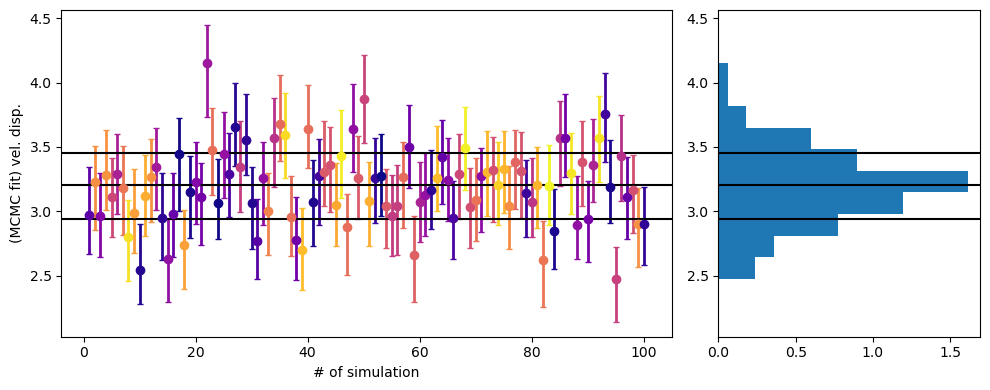

In [3]:
no=4
sigfile=np.loadtxt(f"seguetest/seguetest_2.0_DEIMOS_{no}.txt").T

# median sig # low sig # upper sigma # nstars # observing time
#    0       #.  1.    #.   2.       #. 3.    #.   4

med_sig=sigfile[0]
upp_sig=sigfile[0]-sigfile[1]
low_sig=sigfile[2]-sigfile[0]


f,ax=plt.subplots(1,2,width_ratios=[7, 3],figsize=(10,4))

a=ax[0]
ine=range(len(sigfile[0]))
colors=plt.get_cmap('plasma')
ran=colors(np.random.rand(len(sigfile[0])))
for c in ine:
    a.errorbar([c+1],[med_sig[c]],yerr=[ [low_sig[c]] ,[upp_sig[c]] ],marker='o',linewidth=0,elinewidth=2,color=ran[c],capsize=2)
a.set_xlabel('# of simulation')
a.set_ylabel('(MCMC fit) vel. disp.')

a2=ax[1]


a2.hist(med_sig,density=True,orientation="horizontal")
a2.errorbar(np.zeros(len(med_sig)),med_sig,yerr=[low_sig,upp_sig],alpha=0)
#a2.set_xlabel('1 sigma interval')
linez=np.percentile(med_sig,[15.9,50,84.1])
for l in linez:
    a2.axhline(l,color='black')
    a.axhline(l,color='black')
print(linez)
print(linez[1]-linez[0],linez[2]-linez[1])
plt.tight_layout()
plt.show()
print(low_sig)
print(upp_sig)

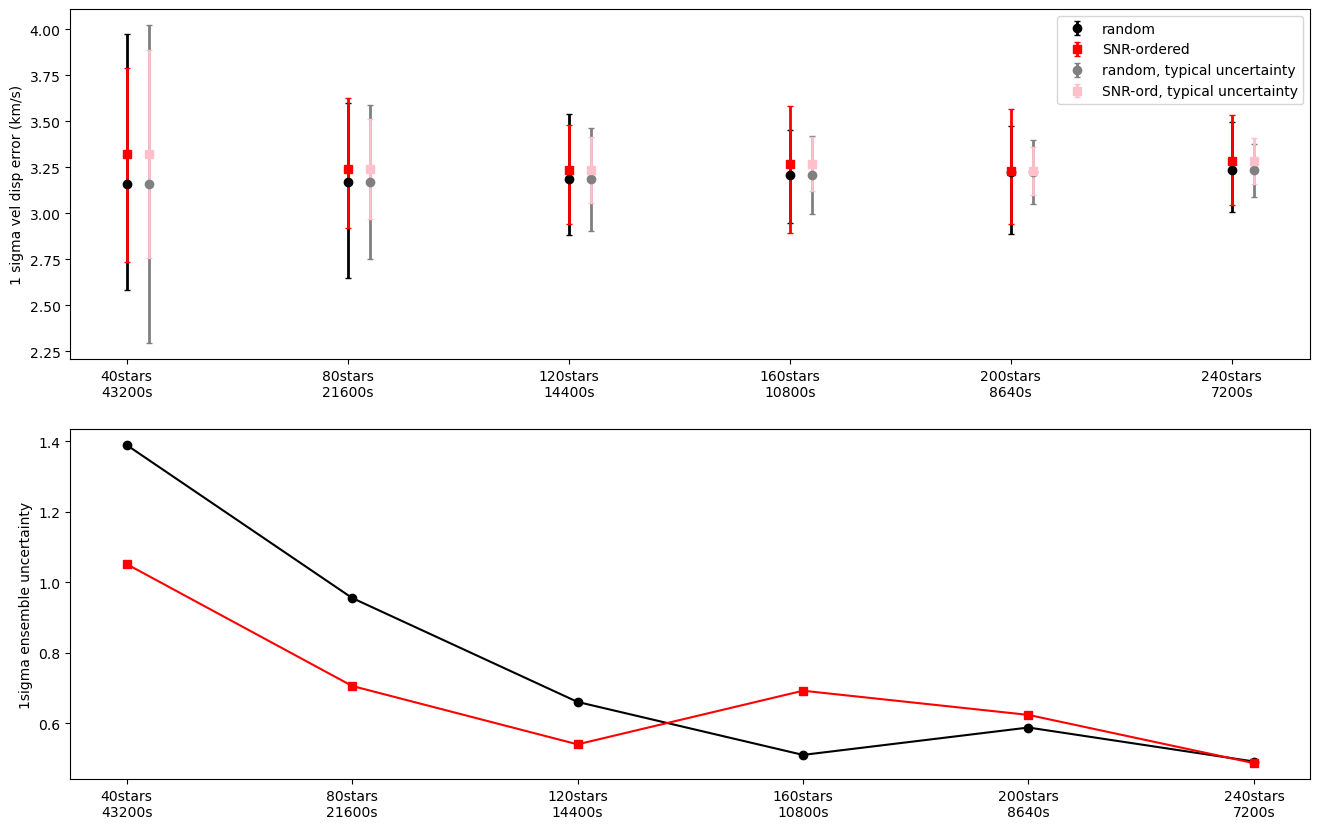

In [9]:
median=[]
lowers=[]
uppers=[]

medians=[]
lowerss=[]
upperss=[]

typic=[]
typics=[]
nframes=[1,2,3,4,5,6]

for no in nframes:
    sigfile=np.loadtxt(f"seguetest/seguetest_2.0_DEIMOS_{no}.txt").T

    med_sig=sigfile[0]
    upp_sig=sigfile[0]-sigfile[1]
    low_sig=sigfile[2]-sigfile[0]

    linez=np.percentile(med_sig,[15.9,50,84.1])
    median.append(linez[1])
    lowers.append(linez[1]-linez[0])
    uppers.append(linez[2]-linez[1])
    typic.append(np.mean(np.mean(upp_sig**2+low_sig**2) ))
    
    sigfiles=np.loadtxt(f"seguetest/seguetest_2.0_DEIMOS_{no}s.txt").T

    med_sigs=sigfiles[0]
    upp_sigs=sigfiles[0]-sigfiles[1]
    low_sigs=sigfiles[2]-sigfiles[0]


    linezs=np.percentile(med_sigs,[15.9,50,84.1])
    medians.append(linezs[1])
    lowerss.append(linezs[1]-linezs[0])
    upperss.append(linezs[2]-linezs[1])
    typics.append(np.mean(np.mean(upp_sigs**2+low_sigs**2) ))

f,az=plt.subplots(2,figsize=(16,10))
a=az[0]
tottime=12*3600

a.set_xticks(nframes)
#a.axhline(0,linestyle='dotted',color='black')
#a.fill_between(nframes,[0 for i in sg_lwe],sg_sigdif,alpha=0.5)
a.errorbar(nframes,median,yerr=[lowers,uppers],marker='o',color='black',linewidth=0,elinewidth=2,capsize=2,label='random')
a.errorbar(nframes,medians,yerr=[lowerss,upperss],marker='s',color='red',linewidth=0,elinewidth=2,capsize=2,label='SNR-ordered')

typ=[n+0.1 for n in nframes]
a.errorbar(typ,median,yerr=typic,marker='o',color='grey',linewidth=0,elinewidth=2,capsize=2,label='random, typical uncertainty')
a.errorbar(typ,medians,yerr=typics,marker='s',color='pink',linewidth=0,elinewidth=2,capsize=2,label='SNR-ord, typical uncertainty')


#a.fill_between(nframes,[-i for i in sg_lwe],sg_upe,alpha=0.5)
a.set_ylabel("1 sigma vel disp error (km/s)")
a.set_xticklabels([f"{(j+1)*40}stars\n{tottime/nframes[j]:.0f}s" for j in range(len(nframes))])

a2=az[1]
a2.plot(nframes,[(lowers[i]+uppers[i]) for i in range(len(lowers))],marker='o',color='black')
a2.plot(nframes,[(lowerss[i]+upperss[i]) for i in range(len(lowerss))],marker='s',color='red')
a2.set_xticks(nframes)
a2.set_xticklabels([f"{nframes[j]*40}stars\n{tottime/nframes[j]:.0f}s" for j in range(len(nframes))])
a2.set_ylabel('1sigma ensemble uncertainty')
a.legend()
plt.show()

# Bootstrapping the data to get uncertainties

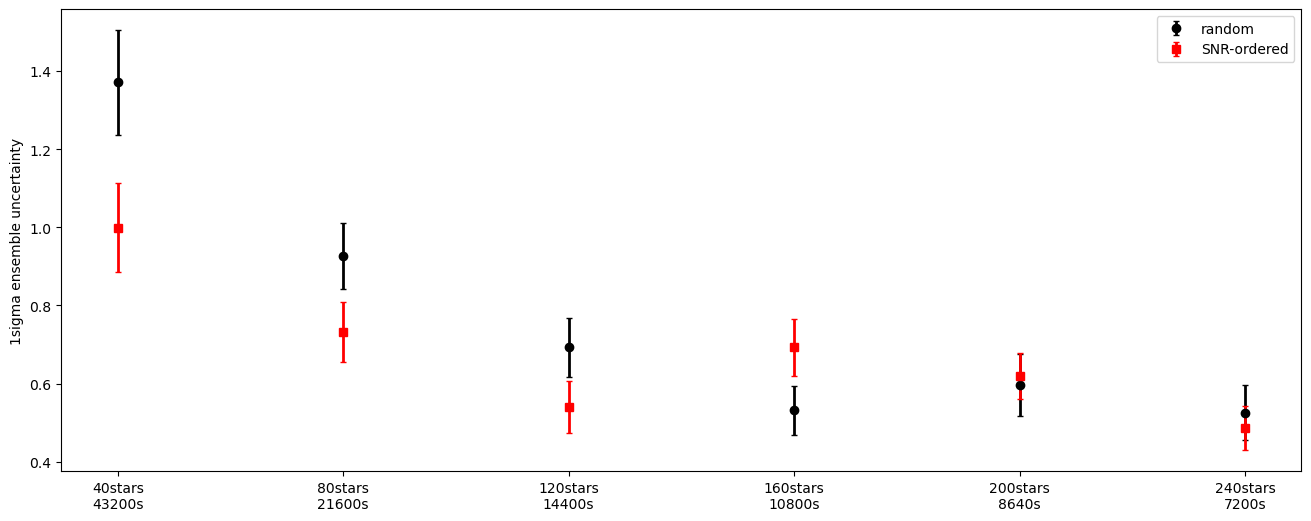

In [7]:
from scipy.stats import bootstrap

def make_1sig(sample):
    linezs=np.percentile(sample,[15.9,84.1])
    return linezs[1]-linezs[0]

f,a2=plt.subplots(1,figsize=(16,6))
tottime=12*3600

uncert=[]
uncerts=[]

unun=[]
ununs=[]

for no in nframes:
    sigfile=np.loadtxt(f"seguetest/seguetest_2.0_DEIMOS_{no}.txt").T

    med_sig=sigfile[0]
    
    dis=bootstrap((med_sig,),make_1sig,n_resamples=1000).bootstrap_distribution
    uncert.append(np.mean(dis))
    unun.append(np.std(dis))

    
    sigfiles=np.loadtxt(f"seguetest/seguetest_2.0_DEIMOS_{no}s.txt").T
    med_sigs=sigfiles[0]

    dis=bootstrap((med_sigs,),make_1sig,n_resamples=1000).bootstrap_distribution
    uncerts.append(np.mean(dis))
    ununs.append(np.std(dis))
    
a2.errorbar(nframes,uncert,yerr=unun,marker='o',color='black',linewidth=0,elinewidth=2,capsize=2,label='random')
a2.errorbar(nframes,uncerts,yerr=ununs,marker='s',color='red',linewidth=0,elinewidth=2,capsize=2,label='SNR-ordered')

#a2.plot(nframes,[(lowers[i]+uppers[i]) for i in range(len(lowers))],marker='o',color='black')
#a2.plot(nframes,[(lowerss[i]+upperss[i]) for i in range(len(lowerss))],marker='s',color='red')

a2.set_xticks(nframes)
a2.set_xticklabels([f"{nframes[j]*40}stars\n{tottime/nframes[j]:.0f}s" for j in range(len(nframes))])
a2.set_ylabel('1sigma ensemble uncertainty')
a2.legend()
plt.show()

Visually, it would seem that these might actually be different curves from each other and specifically, that SNR ordering might make a difference when we have fewer points.